In [1]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
from matplotlib import pyplot as plt

In [2]:
def plot_num_atoms(path, name, save=False):
    smile_list = pd.read_csv(path,squeeze=True).astype(str).tolist()
    
    tot=0
    atom_num_dict = {}
    atom_num_list = []
    
    longest = 0 
    for smile in smile_list: 
        cnt = Chem.MolFromSmiles(smile).GetNumAtoms()
        atom_num_list.append(cnt)
        
        if cnt > longest:
            longest = cnt
        
        tot = tot + cnt
        
        if cnt in atom_num_dict.keys():
            atom_num_dict[cnt] = atom_num_dict[cnt]+1
        else:
            atom_num_dict[cnt] = 1    
    
    print("Total num : {}".format(len(atom_num_list)))
    print("Mean : {}".format(np.mean(atom_num_list)))
    print("Variance : {}".format(np.var(atom_num_list)))
    print("Longest : {}".format(longest))
    print("Shortest : {}".format(np.min(atom_num_list)))
    
    #fill the blank
    for l in range(longest+1):
        if l not in atom_num_dict.keys():
            atom_num_dict[l] = 0
    
    plt.plot(atom_num_dict.keys(), atom_num_dict.values())
    plt.xlabel("Atom's num")
    plt.ylabel("How many")
    plt.grid()
    if save:
        plt.savefig('./data_distribution_result/{}.png'.format(name))
    plt.show()
    
    return atom_num_dict

In [3]:
def compare_mol_dist(dataA, dataB, nameA, nameB, save=False):
    plt.plot(dataA.keys(), dataA.values())
    plt.plot(dataB.keys(), dataB.values())
    plt.legend([nameA,nameB])
    plt.xlabel("Atom's num")
    plt.ylabel("How many")
    plt.grid()
    if save:
        plt.savefig('./data_distribution_result/{}_{}.png'.format(nameA,nameB))
    plt.show()

In [4]:
def cut_off_atoms(path, name, max_length, save=False):
    smile_list = pd.read_csv(path,squeeze=True).astype(str).tolist()
    
    tot=0
    atom_num_dict = {}
    atom_num_list = []
    
    longest = 0 
    
    after_smile_list = []
    for smile in smile_list: 
        cnt = Chem.MolFromSmiles(smile).GetNumAtoms()
        
        if cnt <= max_length:
            after_smile_list.append(smile)
        
            atom_num_list.append(cnt)

            if cnt > longest:
                longest = cnt

            tot = tot + cnt

            if cnt in atom_num_dict.keys():
                atom_num_dict[cnt] = atom_num_dict[cnt]+1
            else:
                atom_num_dict[cnt] = 1    
    
    print("Total num : {}".format(len(atom_num_list)))
    print("Mean : {}".format(np.mean(atom_num_list)))
    print("Variance : {}".format(np.var(atom_num_list)))
    print("Longest : {}".format(longest))
    print("Shortest : {}".format(np.min(atom_num_list)))
    
    #fill the blank
    for l in range(longest+1):
        if l not in atom_num_dict.keys():
            atom_num_dict[l] = 0
    
    plt.plot(atom_num_dict.keys(), atom_num_dict.values())
    plt.xlabel("Atom's num")
    plt.ylabel("How many")
    plt.grid()
    if save:
        plt.savefig('./data_distribution_result/{}.png'.format(name))
    plt.show()
    
    return atom_num_dict, after_smile_list

Total num : 176333
Mean : 29.8800621551
Variance : 113.745858316
Longest : 170
Shortest : 2


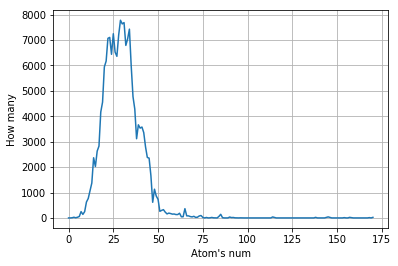

In [8]:
path = './data/l1000_121/all.txt'

l1000_all =plot_num_atoms(path, "l1000_all")


Total num : 220010
Mean : 23.1548065997
Variance : 20.3159240126
Longest : 38
Shortest : 6


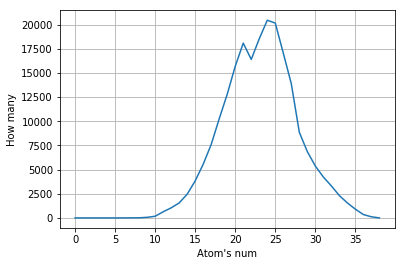

In [6]:
path = './data/zinc/train.txt'

zinc =plot_num_atoms(path, "zinc_train")


Total num : 152913
Mean : 27.1342135724
Variance : 50.4102236883
Longest : 40
Shortest : 2


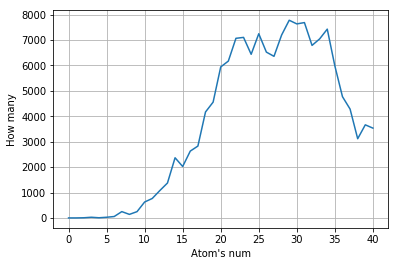

In [5]:
path = './data/l1000_121/all.txt'

l1000_all_max40, l1000_all_max40_list  =cut_off_atoms(path, "l1000_all_max40", 40)

In [ ]:
compare_mol_dist(l1000_all_max40, zinc, "l1000_all_max40", "zinc_train")

In [ ]:
compare_mol_dist(train_121, zinc, "l1000_train_121", "zinc_train")

In [ ]:
compare_mol_dist(train_121, l1000_all, "l1000_train_121", "l1000_all")

# List to Text File

In [11]:
def save_txt(smile_list, save_path, name):
    f = open(save_path+name+".txt",'w')
    #f.writelines('\n'.join(smile_list))
    
    f.write(smile_list[0]+'\n')
    for l in smile_list:
        #print(l)
        f.write(l+'\n')
    
    f.close()

In [12]:
save_path = "./data/l1000_121/max_40/"
name = 'all_max40'

save_txt(l1000_all_max40_list, save_path, name)

# Split Train, Valid, Test

In [25]:
def split_data(all_path):
    '''
    len(valid) :10000
    len(test)  :5000
    len(train) :else
    '''
    smile_list = pd.read_csv(all_path,squeeze=True).astype(str).tolist()
    
    return smile_list[:-15000], smile_list[-15000:-5000],  smile_list[-5000:]

In [26]:
path = './data/l1000_121/max_40/train_max40.txt'
tr, v, te=split_data(path)

# Save to File

In [30]:
save_path = './data/l1000_121/max_40/'

save_txt(tr, save_path, "train_max40")
save_txt(v, save_path, "valid_max40")
save_txt(te, save_path, "test_max40")

In [35]:
path = './data/l1000_121/max_40/train_max40.txt'
smile_list = pd.read_csv(path,squeeze=True).astype(str).tolist()
len(smile_list)

137913

In [34]:
len(tr)

137913

In [28]:
len(v)

10000

In [29]:
len(te)

5000